### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [109]:
pd.set_option('display.max_columns', 20)
df_boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

Description of variables in order:

CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sqft
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    Lower status of the population
MEDV     Median value of owner-occupied homes in $1000's
 

## Data Cleaning


In [28]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [29]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
df_boston.shape

(506, 14)

In [32]:
missing_values = df_boston.isnull().sum().sort_values(ascending=False)
missing_values

medv       0
lstat      0
b          0
ptratio    0
tax        0
rad        0
dis        0
age        0
rm         0
nox        0
chas       0
indus      0
zn         0
crim       0
dtype: int64

## Search for Outliers

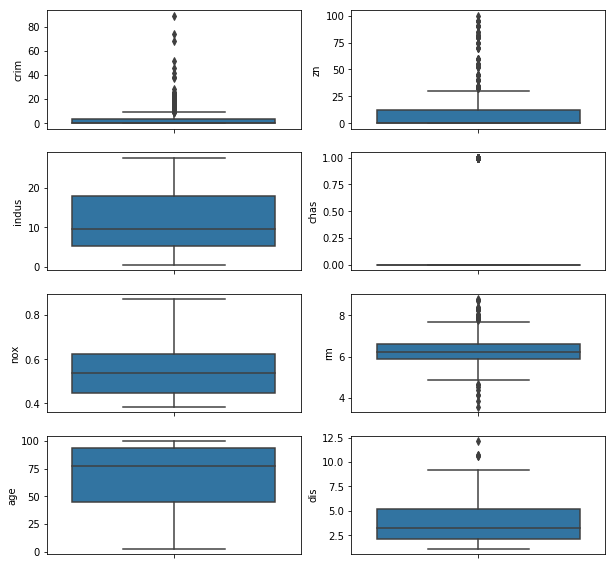

In [53]:
plt.subplots(figsize=(10,10))

plt.subplot(421)
sns.boxplot(x=df_boston['crim'], orient="v")

plt.subplot(422)
sns.boxplot(x=df_boston['zn'], orient="v")

plt.subplot(423)
sns.boxplot(x=df_boston['indus'], orient="v")

plt.subplot(424)
sns.boxplot(x=df_boston['chas'], orient="v")

plt.subplot(425)
sns.boxplot(x=df_boston['nox'], orient="v")

plt.subplot(426)
sns.boxplot(x=df_boston['rm'], orient="v")

plt.subplot(427)
sns.boxplot(x=df_boston['age'], orient="v")

plt.subplot(428)
sns.boxplot(x=df_boston['dis'], orient="v")

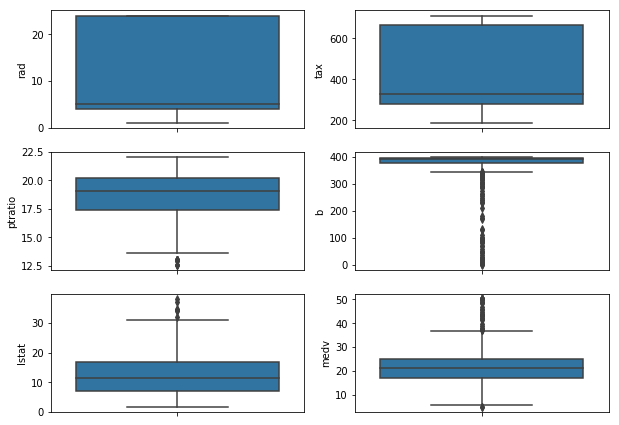

In [54]:
plt.subplots(figsize=(10,10))

plt.subplot(421)
sns.boxplot(x=df_boston['rad'], orient="v")

plt.subplot(422)
sns.boxplot(x=df_boston['tax'], orient="v")

plt.subplot(423)
sns.boxplot(x=df_boston['ptratio'], orient="v")

plt.subplot(424)
sns.boxplot(x=df_boston['b'], orient="v")

plt.subplot(425)
sns.boxplot(x=df_boston['lstat'], orient="v")

plt.subplot(426)
sns.boxplot(x=df_boston['medv'], orient="v")

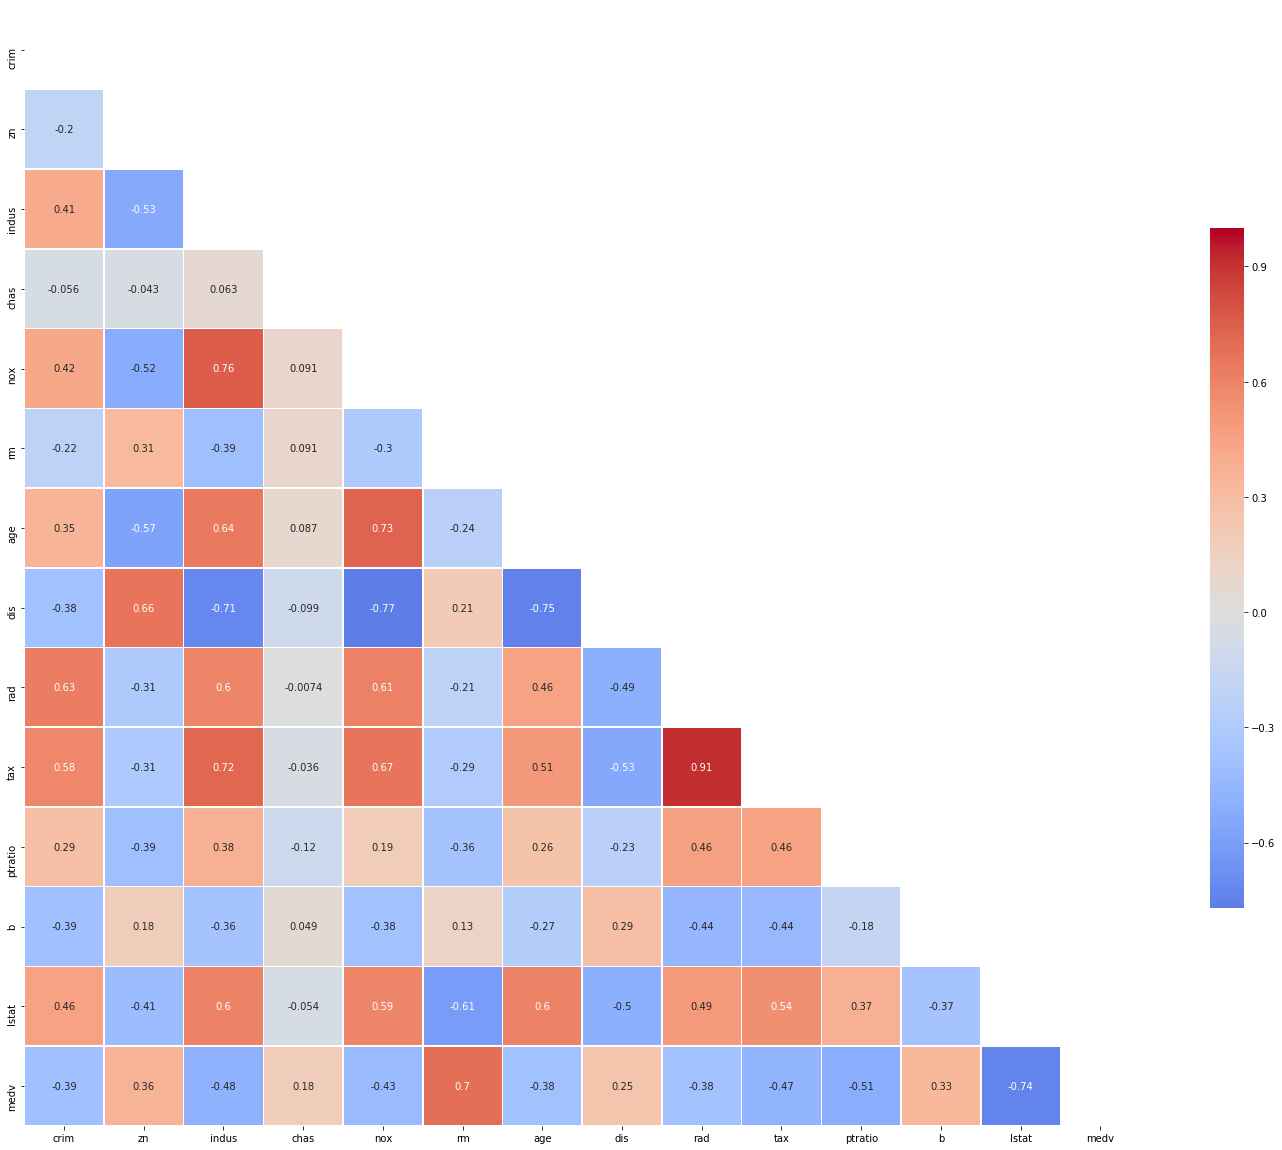

In [56]:
corr = df_boston.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

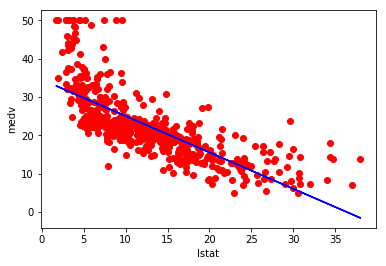

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')

X = df_boston[["lstat"]]
y = df_boston[["medv"]]
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()



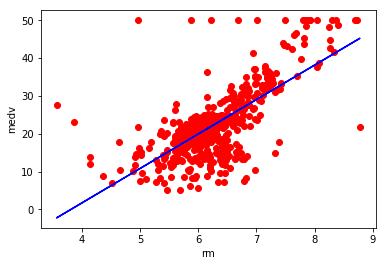

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')

X = df_boston[["rm"]]
y = df_boston[["medv"]]
plt.xlabel('rm')
plt.ylabel('medv')
plt.show()

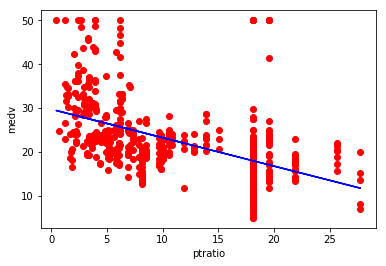

R2: -0.14


In [96]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')

X = df_boston[["ptratio"]]
y = df_boston[["medv"]]
plt.xlabel('ptratio')
plt.ylabel('medv')
plt.show()
y_predict = lin_reg.predict(X)
y_predict
print('R2: %.2f' % r2_score(df_boston.medv, y_predict))

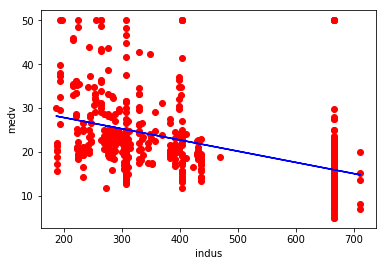

R2: -1.20


In [95]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')

X = df_boston[["indus"]]
y = df_boston[["medv"]]
plt.xlabel('indus')
plt.ylabel('medv')
plt.show()
y_predict = lin_reg.predict(X)
y_predict
print('R2: %.2f' % r2_score(df_boston.medv, y_predict))

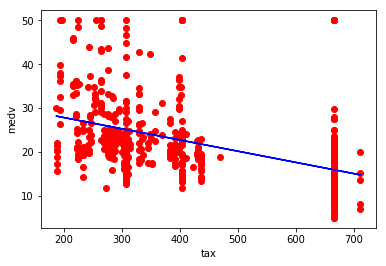

R2: 0.22


In [94]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')


X = df_boston[["tax"]]
y = df_boston[["medv"]]
plt.xlabel('tax')
plt.ylabel('medv')
plt.show()
y_predict = lin_reg.predict(X)
y_predict
print('R2: %.2f' % r2_score(df_boston.medv, y_predict))

In [110]:
x = df_boston.drop('medv', axis = 1)
y = df_boston['medv']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [113]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

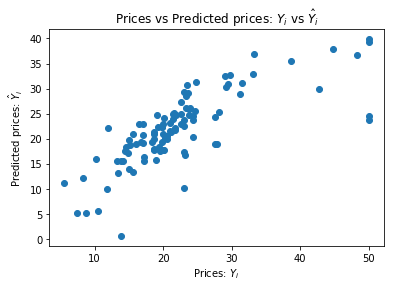

In [114]:
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [119]:
x = df_boston["indus"]
y = df_boston["medv"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')


plt.xlabel('indus')
plt.ylabel('medv')
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[ 6.2  10.81  4.93  7.87 18.1  18.1  11.93  6.09 19.58 18.1   7.87 10.01
  7.87 10.59 18.1  21.89 18.1   1.21  3.44 18.1   6.91  9.69  9.9  25.65
  2.18  5.86  5.13  6.41 18.1  18.1  27.74 19.58 18.1   1.22  6.2  19.58
  5.86 18.1  18.1   9.69  2.46  5.64 12.83  8.14  1.47  2.18 18.1  18.1
  9.9   2.18 21.89  6.96 21.89  2.24 25.65  8.14  6.07  8.14 18.1   8.14
  3.33  6.2   1.38  7.38  7.38  4.86 18.1  18.1   2.93 18.1  18.1  19.58
 18.1  18.1   9.69  9.69 18.1   5.64 18.1  18.1   5.19 19.58  8.56  7.38
  5.13  2.01  2.46 18.1  18.1   3.97  3.41  9.9   3.97 15.04  6.09 18.1
  9.9   3.33 15.04  8.14  3.97  1.52 19.58 19.58 19.58  5.86 18.1  19.58
  4.49  6.2  18.1   3.37  9.9  18.1  21.89  8.56 18.1   7.07 18.1   6.2
  8.14 19.58  3.64 18.1   8.14 10.01  4.93  8.56 18.1   9.9   4.05  5.86
 10.01 19.58 18.1  25.65  3.97 10.01 18.1   4.15 18.1  21.89  3.44  1.69
  2.46 25.65  2.97  8.14 18.1  18.1  18.1   6.2  21.89  8.14 18.1   6.91
  5.13  1.47  6.96  5.32 13.89 10.81  5.96 18.1   8.14 18.1   4.39 18.1
 13.89  8.14 18.1  13.92 19.58  5.19 18.1  21.89 10.59  8.56  1.91  1.25
  1.91 10.59 18.1   3.44 10.59  2.68  6.2   3.97  6.07  8.14 13.89  6.2
 21.89 10.01 19.58 18.1  18.1   2.95  6.41 18.1  12.83  9.9   9.9   8.14
  5.32 18.1   9.69  6.2  19.58  4.86 11.93 18.1   8.56 19.58 19.58  8.14
  3.78  8.56 18.1  21.89  6.2   3.97 18.1   9.9  11.93 18.1   5.86  6.06
 18.1   8.14  3.24 13.92  6.96  6.2  18.1   2.18  2.02 25.65  3.33  1.76
 12.83  2.46 18.1  18.1   6.41 13.92 18.1   2.46 18.1   4.86  2.18  3.97
  7.87 18.1   4.49  3.97  5.96 18.1   5.13  6.91  6.96  5.64 10.59 18.1
 18.1  18.1  25.65  6.2   5.13 18.1  21.89  3.44  8.14  6.91 18.1   2.31
  2.03 18.1  18.1   2.89  1.25  2.18  9.69  4.05 18.1   3.75 15.04 18.1
  2.89 18.1  19.58  6.07  2.18  6.91  1.52 18.1  18.1  10.59  3.33  6.2
 19.58 19.58  5.19  2.46 18.1  21.89 18.1  11.93  3.97  7.38  2.68  4.49
 25.65 27.74 18.1  18.1  18.1  18.1   3.41  4.86  3.97 10.01 18.1   4.95
  1.32 18.1   7.38  3.97 18.1  18.1   6.91  8.56 18.1  18.1   6.96 18.1
  5.96 18.1   5.64 18.1  18.1  21.89  4.95  8.14  2.46 18.1  19.58 19.58
  5.86  2.03  8.14  8.14 21.89  2.46 18.1  18.1   5.32 18.1  18.1  18.1
 19.58  2.25 27.74  4.05  2.89  5.19 18.1  18.1   5.19  1.52  4.93 18.1
 10.01 18.1   3.97 10.81  5.19  8.14 19.58  5.19 27.74  4.05 27.74  2.95
  2.93  9.9  18.1   3.41 18.1  10.81  4.49  4.95  4.93  6.41 10.59  7.87
 18.1   0.46  5.86  7.38  3.44 10.01  6.91  4.05].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.